<a href="https://colab.research.google.com/github/hrushikute/DataAnalytics/blob/master/02_neural_netwrok_model_for_classification_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Usually There type fo classificaiton
1. Binary Classification
2. Multiclass classification
3. Multilabel Classification


In [ ]:
# Lets get the data for calssisfication

from sklearn.datasets import make_circles

In [ ]:
#samples 
n_samples=1000

#create data 
X,y = make_circles(n_samples,noise=0.03)


In [ ]:
X,y

(array([[ 0.82530853,  0.56112464],
        [-0.89011413, -0.47075405],
        [-0.89365618,  0.33663206],
        ...,
        [-0.83059755, -0.59154143],
        [-0.75870785,  0.65905786],
        [-0.56683663,  0.56925049]]),
 array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 0, 0, 

In [ ]:
import pandas as pd
circle_data = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"Label":y})
circle_data.head()

,X0,X1,Label
0,0.825309,0.561125,0
1,-0.890114,-0.470754,0
2,-0.893656,0.336632,0
3,0.129645,-0.799272,1
4,0.750434,0.334816,1


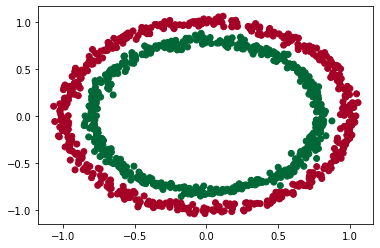

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlGn)

In [ ]:

X_data = circle_data.drop('Label', axis=1)
y_data = circle_data["Label"]

X_data.head(), y_data.head()

(         X0        X1
 0  0.825309  0.561125
 1 -0.890114 -0.470754
 2 -0.893656  0.336632
 3  0.129645 -0.799272
 4  0.750434  0.334816, 0    0
 1    0
 2    0
 3    1
 4    1
 Name: Label, dtype: int64)

In [ ]:

#Lets split the model for train and test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
len(X_train),len(X_test)

(800, 200)

In [ ]:


import tensorflow as tf

In [ ]:
# Lets create a model.
tf.random.set_seed(42)

# Create a model with one hidden layer
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)

])

# Comiple the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model.

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 4.2934 - accuracy: 0.4750
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 4.2145 - accuracy: 0.4563
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 4.1266 - accuracy: 0.4387
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 4.0643 - accuracy: 0.4238
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 4.0253 - accuracy: 0.4212
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 3.8896 - accuracy: 0.4150
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 3.8203 - accuracy: 0.4075
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 3.7979 - accuracy: 0.4087
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 3.7409 - accuracy: 0.4112
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 3.7165 - accuracy: 0.4125
Epoch 11/

# what ??? Just 48 % accuracy.
  Need to add change hyper parameters

In [ ]:
tf.random.set_seed(42)

#create a model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)

])

#compile a model

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# foit the model

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 4.2213 - accuracy: 0.4625
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 4.0760 - accuracy: 0.4650
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 3.9682 - accuracy: 0.4688
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 3.8140 - accuracy: 0.4675
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 3.6038 - accuracy: 0.4675
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 3.2816 - accuracy: 0.4737
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 1.5184 - accuracy: 0.4750
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.8170 - accuracy: 0.4762
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7962 - accuracy: 0.4762
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7863 - accuracy: 0.4762
Epoch 11/

In [ ]:
#Still 50 % lets add one more hidden layer of 100 neurons.
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_3.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 3.3863 - accuracy: 0.4550
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7202 - accuracy: 0.4863
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.5113
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.4913
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4650
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.4375
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.4688
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4850
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.4900
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.4688
Epoch 11/

In [ ]:
model_3.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5050


[0.6964394450187683, 0.5049999952316284]

In [ ]:
# Lets add the activation function with 2 hidden layers and learning rate as 0.001

In [ ]:
tf.random.set_seed(42)

# Create a model

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

#Compile the model

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# fit the model

history_4 = model_4.fit(X_train,y_train,epochs=200)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
25/25 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.5100
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.5075
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5325
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6829 - accuracy: 0.5312
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.5213
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.5312
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.5275
Epoch 8/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.5350
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.5300
Epoch 10/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.5400
Epoch 11/

In [ ]:
model_4.evaluate(X_train, y_train)

25/25 [==============================] - 0s 1ms/step - loss: 0.1175 - accuracy: 0.9925


[0.11746694892644882, 0.9925000071525574]

In [ ]:
# lets try that model to learn faster.

In [ ]:
tf.random.set_seed(42)
# create a model
model_5=tf.keras.Sequential([
                             tf.keras.layers.Dense(5,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(5,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

#compile a model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

#fit the model
history_5=model_5.fit(X_train,y_train,epochs=25)


Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


25/25 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5250
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.5138
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5738
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6726 - accuracy: 0.5688
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.6000
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6450 - accuracy: 0.6100
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6249 - accuracy: 0.6862
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5890 - accuracy: 0.7725
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.7837
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4599 - accuracy: 0.9137
Epoch 11/25
25/25 [===========

7/7 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.9950


[0.03091532737016678, 0.9950000047683716]

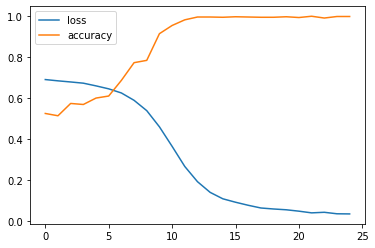

In [ ]:
pd.DataFrame(history_5.history).plot()
model_5.evaluate(X_test,y_test)


**Learning Rate effect:**

So just by increasing the learning rate by 10% we are able to trian the model in 1/10th of epochs. 



#Confusion matrix

In [ ]:
y_pred = model_5.predict(X_test)

model_5.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.9950


[0.03091532737016678, 0.9950000047683716]

In [ ]:
tf.math.confusion_matrix(y_test,y_pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 96,   0],
       [104,   0]], dtype=int32)>

Now this is showing very high false negative case. However accuracy is quite high

**Are we missing some thing?**

In [ ]:
y_pred, y_test


(array([[8.96117926e-01],
        [9.71792817e-01],
        [9.86472607e-01],
        [9.66189504e-01],
        [9.90426302e-01],
        [5.79968095e-03],
        [1.44277215e-02],
        [9.97489095e-01],
        [7.70702958e-03],
        [9.99608159e-01],
        [9.99549687e-01],
        [9.88307059e-01],
        [9.98883307e-01],
        [1.32054090e-04],
        [9.65618908e-01],
        [1.84984207e-02],
        [9.71078157e-01],
        [3.82921100e-03],
        [9.82292652e-01],
        [9.96159852e-01],
        [9.85738397e-01],
        [1.34116411e-03],
        [1.95696950e-03],
        [9.15015638e-02],
        [9.47417676e-01],
        [9.98877943e-01],
        [9.88709927e-01],
        [7.75426626e-04],
        [4.03416157e-03],
        [6.69568777e-04],
        [9.99101758e-01],
        [1.64144933e-02],
        [9.24653649e-01],
        [9.48586583e-01],
        [9.73206758e-01],
        [5.83589077e-04],
        [2.34097242e-04],
        [4.55655754e-02],
        [1.8

So one is having probability and other is in binary. Cool

In [ ]:
y_pred = tf.round(y_pred)
y_pred

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
 

In [ ]:
tf.math.confusion_matrix(y_test, y_pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 95,   1],
       [  0, 104]], dtype=int32)>

Now it make sense

#Lets work on larger data sets
* work on fashion data set from keras for multiclass classificaiton

In [ ]:
import tensorflow as tf

fashion_data = tf.keras.datasets.fashion_mnist
# Data is already split in train and test 
(X_train,y_train),(X_test ,y_test) = fashion_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


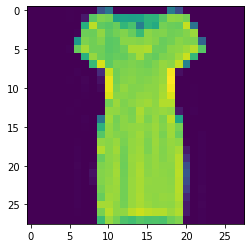

label : 3


In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[20])
plt.show()

print("label : {}".format(y_train[20]))



In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']